<a href="https://colab.research.google.com/github/mar4ello-hash/mnist-deep-learning/blob/main/ML_Task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Task 2: Using a pre-built Deep Learning network***

In [1]:
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### ***Data preprocessing***

In [2]:
# AddNIST dataset
train_X = np.load("/content/drive/My Drive/Colab Notebooks/Machine_Learning_Coursework/train_x.npy", allow_pickle=True)
train_y = np.load("/content/drive/My Drive/Colab Notebooks/Machine_Learning_Coursework/train_y.npy", allow_pickle=True)

test_X = np.load("/content/drive/My Drive/Colab Notebooks/Machine_Learning_Coursework/test_x.npy", allow_pickle=True)
test_y = np.load("/content/drive/My Drive/Colab Notebooks/Machine_Learning_Coursework/test_y.npy", allow_pickle=True)

valid_X = np.load("/content/drive/My Drive/Colab Notebooks/Machine_Learning_Coursework/valid_x.npy", allow_pickle=True)
valid_y = np.load("/content/drive/My Drive/Colab Notebooks/Machine_Learning_Coursework/valid_y.npy", allow_pickle=True)

# True test values
tr = test_y

# image: 32x32, classes: 0-19 
def process(x, y):
    p_x = np.moveaxis(x, 1, -1)
    p_x = tf.image.resize(p_x, [32, 32])

    p_y = tf.keras.utils.to_categorical(y, num_classes=20)

    print(p_x.shape, p_y.shape)

    return p_x, p_y

# AddNIST dataset preprocessing
train_X, train_y = process(train_X, train_y)
test_X, test_y = process(test_X, test_y)
valid_X, valid_y = process(valid_X, valid_y)


(45000, 32, 32, 3) (45000, 20)
(10000, 32, 32, 3) (10000, 20)
(15000, 32, 32, 3) (15000, 20)


### ***AddNIST Visualization***

In [3]:
# Stephen's code

def image_normalization(arr):
    return (arr - arr.min())/(arr.max()-arr.min())

def disable_ax_ticks(ax):
    ax.set_xticks([])
    ax.set_xticks([], minor=True)
    ax.set_yticks([])
    ax.set_yticks([], minor=True)

def show_mnist_examples(x, y):

    # small adjustments
    x = np.moveaxis(x, -1, 0)

    fig = plt.figure(constrained_layout=True,figsize=(6,4), dpi=100)
    gs = fig.add_gridspec(3,4)
    main_ax = fig.add_subplot(gs[:3,:3])
    fig.suptitle(np.argmax(y))
    #main_ax.imshow(np.moveaxis(x, 0, -1))# .imshow(x)
    main_ax.imshow(image_normalization(np.moveaxis(x, 0, -1)))
    disable_ax_ticks(main_ax)

    for j in range(3):
      c_ax = fig.add_subplot(gs[j,-1])
      subimage = x.copy()
      subimage[:j] = 0
      subimage[j+1:] = 0
      subimage[j] = subimage[j]-subimage[j].min()
      c_ax.imshow(image_normalization(np.moveaxis(subimage, 0, -1)))
      disable_ax_ticks(c_ax)
    plt.show()

### ***ResNet50V2***

In [4]:
# Input
input = tf.keras.Input(shape=(32, 32, 3))
resnet = tf.keras.applications.ResNet50V2(weights='imagenet', include_top = False, input_tensor = input)

gap = tf.keras.layers.GlobalMaxPooling2D()(resnet.output)

# Batch normalization
norm = tf.keras.layers.BatchNormalization()(gap) 

# Classifier layer / output
output = tf.keras.layers.Dense(20, activation='softmax', use_bias=True)(norm)

# Building
model = tf.keras.Model(resnet.input, output)

# Summary
# model.summary()

94683136/94668760 [==============================] - 0s 0us/step


### ***Model training***

In [5]:
# Model optimizer, loss and metrics
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['categorical_accuracy'])

# Fit (Don't forget to re-build the model before training)
history = model.fit(train_X, train_y, epochs=30, batch_size=512, validation_data=(valid_X, valid_y))

Epoch 1/30
88/88 [==============================] - 49s 304ms/step - loss: 2.8581 - categorical_accuracy: 0.1109 - val_loss: 12.9112 - val_categorical_accuracy: 0.0694
Epoch 2/30
88/88 [==============================] - 17s 197ms/step - loss: 2.0861 - categorical_accuracy: 0.2966 - val_loss: 4.3235 - val_categorical_accuracy: 0.1813
Epoch 3/30
88/88 [==============================] - 17s 195ms/step - loss: 1.5839 - categorical_accuracy: 0.4639 - val_loss: 1.9817 - val_categorical_accuracy: 0.4145
Epoch 4/30
88/88 [==============================] - 17s 192ms/step - loss: 1.1626 - categorical_accuracy: 0.6297 - val_loss: 1.6820 - val_categorical_accuracy: 0.5176
Epoch 5/30
88/88 [==============================] - 17s 192ms/step - loss: 0.7954 - categorical_accuracy: 0.7570 - val_loss: 1.4300 - val_categorical_accuracy: 0.6374
Epoch 6/30
88/88 [==============================] - 17s 194ms/step - loss: 0.5751 - categorical_accuracy: 0.8263 - val_loss: 1.1057 - val_categorical_accuracy: 0.71

### ***Metrics***

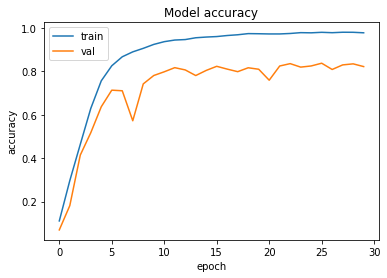

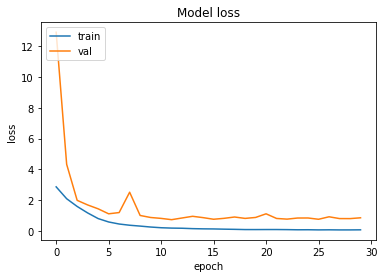

Accuracy: 0.8309999704360962
Loss: 0.8009229302406311
F1 score: 0.831


In [6]:
# History for accuracy
plt.plot(history.history['categorical_accuracy'])
plt.plot(history.history['val_categorical_accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

print('===================================================')

# History for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

score = model.evaluate(test_X, test_y, verbose=0)
print('===================================================')
print('Accuracy:', score[1])
print('Loss:', score[0])

from sklearn.metrics import f1_score
prediction = model.predict(test_X)

pr = []
for i in range(prediction.shape[0]):
    pr.append(np.argmax(prediction[i]))

# to numpy array
pr = np.asarray(pr)

# F1 score 2*(precision*recall/precision+recall)
print("F1 score:", f1_score(tr, pr, average='micro'))


### ***Random prediction***

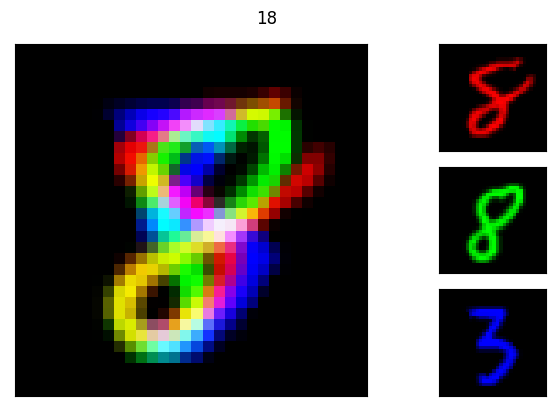

 Final prediction for your sample using ResNet50V2 Deep Learning model: 18


In [7]:
import random

count = test_X.shape[0]
ri = random.randrange(count)

# Visualization
show_mnist_examples(test_X[ri], test_y[ri])

# Prediction
print('================================================================\n',
      'Final prediction for your sample using ResNet50V2 Deep Learning model:', 
      np.argmax(model.predict(np.array([test_X[ri]]))))